In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_palette("tab20b")
sns.set_style("whitegrid")

df = pd.read_csv('/Users/angelikalin/Downloads/HealthcareProject/HepatitisCdata.csv').drop(['Unnamed: 0'], axis=1)

va_df = pd.read_csv('/Users/angelikalin/Downloads/HealthcareProject/hepatitis_C_EHRs_Japan.csv')

In [2]:
df.head()

Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7

In [3]:
va_df.head()

cirrhosis  age  sex  cholesterol  triglyceride HDL   LDL  PathDiagNum  \
0          1   63    1          103           147  35  38.6            1   
1          0   68    2          141            95  38    84            1   
2          1   79    1          143            71  60  68.8            1   
3          1   52    1          126            64  39  74.2            1   
4          1   77    2          126            49  41  75.2            1   

    BMI  ALT  AST  glucose  serogroup01  
0  20.0   27   35      117          0.0  
1  23.1   78   74       98          0.0  
2  21.3   44   40       95          0.0  
3  34.0   18   26      101          0.0  
4  25.7  106   97      128          0.0

In [4]:
print("Dimensions of data:{}".format(df.shape))

Dimensions of data:(615, 13)


In [5]:
print("Dimensions of data:{}".format(va_df.shape))

Dimensions of data:(123, 13)


In [6]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [7]:
va_df.isna().sum()

cirrhosis        0
age              0
sex              0
cholesterol      0
triglyceride     0
HDL              0
LDL              0
PathDiagNum      0
BMI              0
ALT              0
AST              0
glucose          0
serogroup01     25
dtype: int64

Background: https://ieeexplore.ieee.org/document/9347427
1. ALT & AST bloodstreem values is the main component of the routine Liver Function Tests (LFTs) - a main identification of a patient's primary disorder as of hepatitic or cholestatic source. 
    - but not straightfoward since they may be influenced by a wide range of non-hepatic factors 
    - not liver specific, hence they could play a role in detecting metabolic disturbances in Alzheimer - they're associated (consistently) with cognitive performance 
    - AST/ALT ratio can be useful for cirrhosis suggestion, but not for diagnosis, called the DeRitis ratio, could be use as a benchmark
2. data 
    - df https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset/code
    - validation df https://www.kaggle.com/datasets/davidechicco/hepatitis-c-ehrs-from-japan?resource=download

## 1. Data Prep

In [8]:
df[['Target', 'Category']] = df['Category'].str.split('=', expand=True)

In [9]:
df = df.drop(['Category'], axis=1)

In [10]:
df['Sex'] = df['Sex'].replace({'m':0, 'f':1})
df

Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0     32    0  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1     32    0  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2     32    0  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3     32    0  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4     32    0  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..   ...  ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
610   62    1  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611   64    1  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612   64    1  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2   
613   46    1  33.0    NaN   39.0   62.0  20.0   3.56  4.20   52.0   50.0   
614   59    1  36.0    NaN  100.0   80.0  12.0   9.07  5.30   67.0   34.0   

     PROT Target  
0    69.0      0  
1    76.5      0  
2    79.3      0  
3    75.7      0  
4    68.7      0  
..    ...    ...  
610  68.5      3  
611  71.3      3  
612  82.0      3  
613  71.0      3  
614  68.0      3  

[615 rows x 13 columns]

## 2. EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    int64  
 2   ALB     614 non-null    float64
 3   ALP     597 non-null    float64
 4   ALT     614 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    605 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    614 non-null    float64
 12  Target  615 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [12]:
df.describe()

Age         Sex         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean    47.408130    0.386992   41.620195   68.283920   28.450814   34.786341   
std     10.055105    0.487458    5.780629   26.028315   25.469689   33.090690   
min     19.000000    0.000000   14.900000   11.300000    0.900000   10.600000   
25%     39.000000    0.000000   38.800000   52.500000   16.400000   21.600000   
50%     47.000000    0.000000   41.950000   66.200000   23.000000   25.900000   
75%     54.000000    1.000000   45.200000   80.100000   33.075000   32.900000   
max     77.000000    1.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.205657    1.132728    49.756166   54.661071    5.402636  
min      0.800000    1.420000    1.430000     8.000000    4.500000   44.800000  
25%      5.300000    6.935000    4.610000    67.000000   15.700000   69.300000  
50%      7.300000    8.260000    5.300000    77.000000   23.300000   72.200000  
75%     11.200000    9.590000    6.060000    88.000000   40.200000   75.400000  
max    254.000000   16.410000    9.670000  1079.100000  650.900000   90.000000

### 2.1 Handle null values 
Despite the risk of dropping null values, we're focusing on patients portfolios that have all data as a first step. We could test out different methods managing null values later. 

In [13]:
df.dropna(inplace=True)
df.isna().sum()

Age       0
Sex       0
ALB       0
ALP       0
ALT       0
AST       0
BIL       0
CHE       0
CHOL      0
CREA      0
GGT       0
PROT      0
Target    0
dtype: int64

In [14]:
df['Target'].value_counts()

0     526
3      24
1      20
2      12
0s      7
Name: Target, dtype: int64

In [15]:
df

Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0     32    0  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1     32    0  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2     32    0  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3     32    0  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4     32    0  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..   ...  ...   ...    ...   ...    ...   ...    ...   ...    ...    ...   
608   58    1  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   49.7   
609   59    1  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1  101.1   
610   62    1  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611   64    1  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612   64    1  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   64.2   

     PROT Target  
0    69.0      0  
1    76.5      0  
2    79.3      0  
3    75.7      0  
4    68.7      0  
..    ...    ...  
608  80.6      3  
609  70.5      3  
610  68.5      3  
611  71.3      3  
612  82.0      3  

[589 rows x 13 columns]

### 2.2 Manage 0s and biased data 
The countplot below revealed how the data is heavily skewed. 

In [16]:
sns.countplot(data=df, x='Target')

<AxesSubplot:xlabel='Target', ylabel='count'>

In [17]:
#Giving 0s a new name: 4 
df['Target']= df['Target'].replace({'0s':4}).astype(int)
df.dtypes 

Age         int64
Sex         int64
ALB       float64
ALP       float64
ALT       float64
AST       float64
BIL       float64
CHE       float64
CHOL      float64
CREA      float64
GGT       float64
PROT      float64
Target      int64
dtype: object

### 2.3 A Glance of Distribution | Histograms 
data at a glance

In [18]:
df.columns

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT', 'Target'],
      dtype='object')

In [19]:
#name our data columns 
name_col = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT', 'Target']

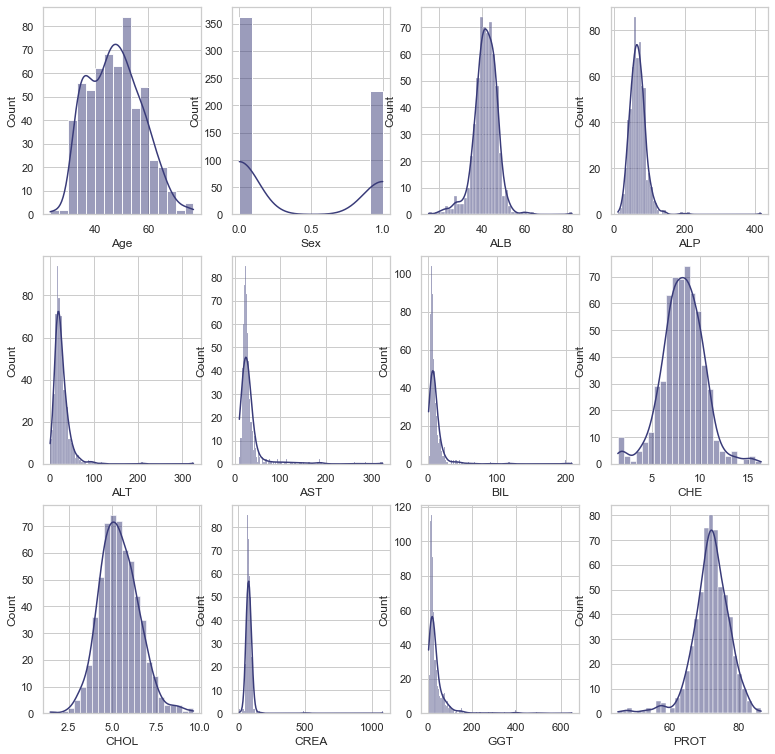

In [20]:
fig, axes = plt.subplots(3, 4, figsize=(13,13))
axes = axes.flatten() #iterate all the axes, loop, for efficiency

for ax, col in zip(axes, name_col):
    sns.histplot(data=df, x=col, ax=ax, kde=True)

#### Comments: 
- Normal Distribution: Age, CHE, CHOL, PROT(slightly left skewed), CREA 
- Right Skewed: ALT, AST, BIL, GGT

### 2.4 Correlation | Heatmap
Glance of correlation between our data points

<AxesSubplot:>

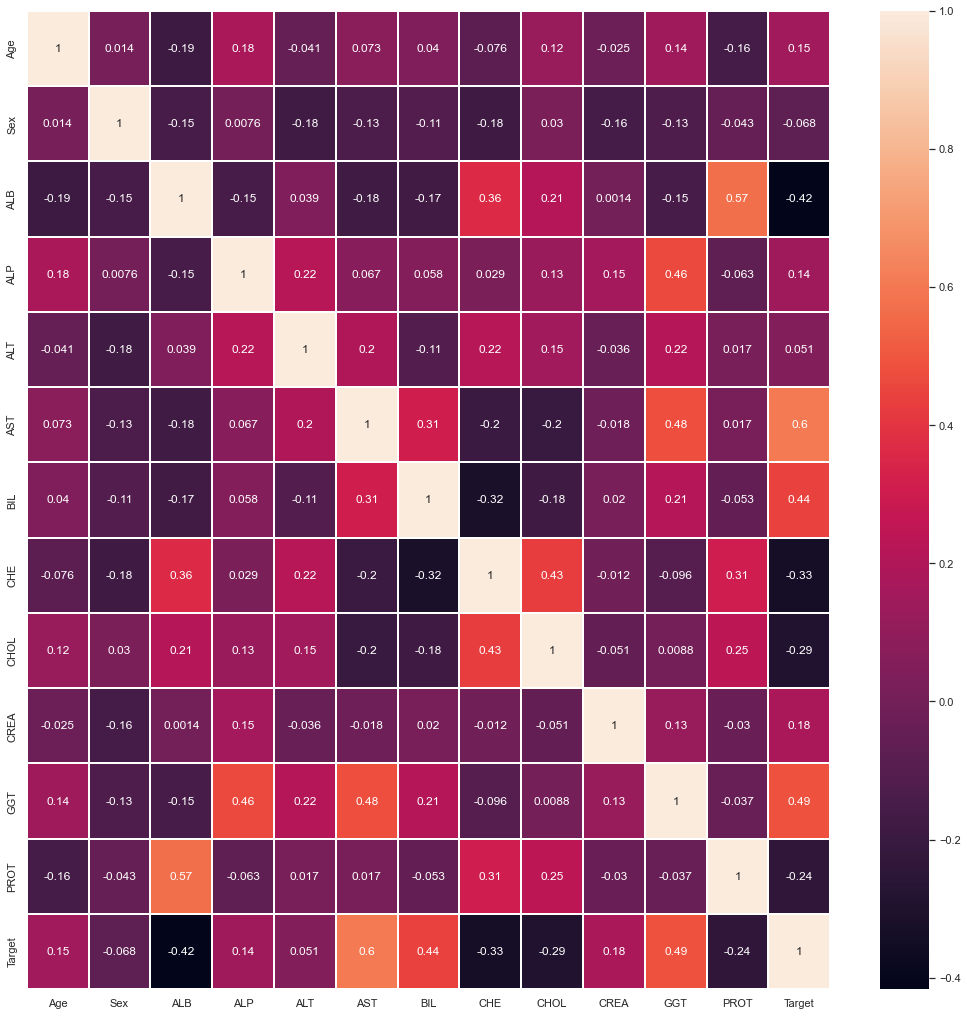

In [21]:
df_corr = df.corr()

plt.figure(figsize=(18,18))
sns.heatmap(data=df_corr, annot=True, linewidths=2)

#### Comments: 
- Our target has positive correlation with AST, BIL, and GGT
- negative correlation with ALB, CHe, CHOL, PROT

## 3. Model Training 
- xgboost 
- catboost 
- random forest (more like a baseline) 

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV


import xgboost as xgb 
from xgboost import XGBClassifier 

import catboost as cb 
from catboost import CatBoostClassifier, Pool  

from sklearn.ensemble import RandomForestClassifier

In [23]:
import numpy as np 
import pandas as pd 

## 3.1 No search no nothing 
We're starting off our models with basic parameters

In [24]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5) 
cb_model = cb.CatBoostClassifier(loss_function = 'MultiClass', verbose=False)
rf_model = RandomForestClassifier(max_depth=10, n_estimators=300) 

In [25]:
X_train = df.drop(['Target'], axis=1)
y_train = df['Target']

kfold = StratifiedKFold(n_splits = 7,
                       shuffle=True, 
                       random_state=42)

models ={
    'XGBoost': xgb_model,
    'CatBoost': cb_model, 
    'RandomForest':rf_model
}


test_pred_EC1 = []
test_pred_EC2 = []
fold_scores = []

for fold_index, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    fold_scores_itr = []
    
    print('=' *70)
    for model_name, model in models.items():
        #fit model 
        model_1 = model 
        model_1.fit(X_fold_train, y_fold_train)
        
        #probabilities on validation 
        fold_prob = model_1.predict(X_fold_val)
        
        #ROC & AUC for val's fold 
        fold_accuracy = accuracy_score(y_fold_val, fold_prob)
        
        #append ROC 
        fold_scores.append((model_name, fold_index, fold_accuracy))
        fold_scores_itr.append(fold_accuracy)
        
        print(f"FOLD{fold_index}==> {model_name}==> ROC:{fold_accuracy}")
        
    print('-'*70)
    print(f'Mean ROC AUC of FOLD {fold_index} == {np.mean(fold_scores_itr)}')
        

FOLD0==> XGBoost==> ROC:0.9647058823529412
FOLD0==> CatBoost==> ROC:0.9529411764705882
FOLD0==> RandomForest==> ROC:0.9411764705882353
----------------------------------------------------------------------
Mean ROC AUC of FOLD 0 == 0.9529411764705881
FOLD1==> XGBoost==> ROC:0.9523809523809523
FOLD1==> CatBoost==> ROC:0.9523809523809523
FOLD1==> RandomForest==> ROC:0.9404761904761905
----------------------------------------------------------------------
Mean ROC AUC of FOLD 1 == 0.9484126984126983
FOLD2==> XGBoost==> ROC:0.9642857142857143
FOLD2==> CatBoost==> ROC:0.9523809523809523
FOLD2==> RandomForest==> ROC:0.9761904761904762
----------------------------------------------------------------------
Mean ROC AUC of FOLD 2 == 0.9642857142857143
FOLD3==> XGBoost==> ROC:0.9285714285714286
FOLD3==> CatBoost==> ROC:0.9523809523809523
FOLD3==> RandomForest==> ROC:0.9285714285714286
----------------------------------------------------------------------
Mean ROC AUC of FOLD 3 == 0.9365079365079

In [26]:
fold_scores_df = pd.DataFrame(fold_scores)
fold_scores_df

0  1         2
0        XGBoost  0  0.964706
1       CatBoost  0  0.952941
2   RandomForest  0  0.941176
3        XGBoost  1  0.952381
4       CatBoost  1  0.952381
5   RandomForest  1  0.940476
6        XGBoost  2  0.964286
7       CatBoost  2  0.952381
8   RandomForest  2  0.976190
9        XGBoost  3  0.928571
10      CatBoost  3  0.952381
11  RandomForest  3  0.928571
12       XGBoost  4  0.964286
13      CatBoost  4  0.964286
14  RandomForest  4  0.940476
15       XGBoost  5  0.976190
16      CatBoost  5  0.964286
17  RandomForest  5  0.964286
18       XGBoost  6  0.940476
19      CatBoost  6  0.952381
20  RandomForest  6  0.940476

In [27]:
pd.DataFrame({
    'CatBoost':np.mean(fold_scores_df[fold_scores_df[0] == 'CatBoost'][2], axis=0), 
    'XGBoost':np.mean(fold_scores_df[fold_scores_df[0] == 'XGBoost'][2], axis=0), 
    'RandomForest':np.mean(fold_scores_df[fold_scores_df[0] == 'RandomForest'][2], axis=0), 
    
    'Mean':np.mean(fold_scores_df[2], axis=0)
}, index=[0])

CatBoost   XGBoost  RandomForest      Mean
0  0.955862  0.955842      0.947379  0.953028

#### Comments:

The CatBoost performed slightly better than the XGBoost, sitting at a 0.955862 accuracy, with a Mean score of 0.951321. 

## 3.2 Hyperparam Search | GridSearch

### GridSearch

In [28]:
from sklearn.model_selection import train_test_split

X = df 
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import warnings
import joblib

# define a list of models to train and their corresponding hyperparameters to tune
models = [
    {
        "name": "CatBoost",
        "estimator": CatBoostClassifier(),
        "hyperparameters": {
            "max_depth": [4,5,6,7,8,9, 10],
            "learning_rate":[0.01,0.02,0.03,0.04], 
            "iterations":[10, 20,30,40,50,60,70,80,90,100]
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            'bootstrap': [True],
            'max_depth': [80, 90, 100, 110],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12],
            'n_estimators': [100, 200, 300, 1000]
        }
    },
    {
        "name": "XGBoost",
        "estimator": XGBClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01,0.05, 0.1,1],
            "max_depth": [3, 5, 10]
        }
    }

]

# train and tune each model
accuracies = []
best_models = {}
for model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=5
        )
        grid_search.fit(X_train, y_train)

        # evaluate the model's performance
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append((model['name'], accuracy))
        best_models[model['name']] = best_model

        print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
        print(f"Accuracy for {model['name']}: {accuracy}")

Training CatBoost...
0:	learn: 1.5784182	total: 999us	remaining: 8.99ms
1:	learn: 1.5500006	total: 1.81ms	remaining: 7.23ms
2:	learn: 1.5247510	total: 2.74ms	remaining: 6.39ms
3:	learn: 1.5003746	total: 3.53ms	remaining: 5.3ms
4:	learn: 1.4741169	total: 4.39ms	remaining: 4.39ms
5:	learn: 1.4504331	total: 5.26ms	remaining: 3.51ms
6:	learn: 1.4252931	total: 6.06ms	remaining: 2.6ms
7:	learn: 1.4018381	total: 6.71ms	remaining: 1.68ms
8:	learn: 1.3803772	total: 7.48ms	remaining: 831us
9:	learn: 1.3577226	total: 8.17ms	remaining: 0us
0:	learn: 1.5786628	total: 665us	remaining: 5.99ms
1:	learn: 1.5504924	total: 1.5ms	remaining: 6ms
2:	learn: 1.5235903	total: 2.26ms	remaining: 5.28ms
3:	learn: 1.4990329	total: 3ms	remaining: 4.5ms
4:	learn: 1.4713008	total: 3.7ms	remaining: 3.7ms
5:	learn: 1.4469966	total: 4.43ms	remaining: 2.96ms
6:	learn: 1.4194190	total: 5.93ms	remaining: 2.54ms
7:	learn: 1.3964275	total: 6.69ms	remaining: 1.67ms
8:	learn: 1.3753911	total: 7.42ms	remaining: 825us
9:	learn: 

In [30]:
#train model 
xgb_model2 = xgb.XGBClassifier(#objective='multi:softmax', 
#                              num_class=5, 
                              learning_rate=0.01,
                             max_depth=3, 
                             n_estimators=200)
cb_model2 = cb.CatBoostClassifier(#loss_function = 'MultiClass', 
                                 # verbose=False, 
                                  max_depth=5, 
                                  iterations = 90, 
                                  learning_rate=0.04)
rf_model2 = RandomForestClassifier(bootstrap = True, 
                                   max_depth=90, #110 
                                  max_features = 3, 
                                  min_samples_leaf = 3, 
                                  min_samples_split = 8, 
                                  n_estimators = 300) #10,300

In [31]:
models2 ={
    'XGBoost': xgb_model2,
    'CatBoost': cb_model2, 
    'RandomForest':rf_model2
}


test_pred_EC1_2 = []
test_pred_EC2_2 = []
fold_scores2 = []

for fold_index2, (train_index2, val_index2) in enumerate(kfold.split(X_train, y_train)):
    X_fold_train2, X_fold_val2 = X_train.iloc[train_index2], X_train.iloc[val_index2]
    y_fold_train2, y_fold_val2 = y_train.iloc[train_index2], y_train.iloc[val_index2]
    
    fold_scores_itr2 = []
    
    print('=' *70)
    for model_name, model in models2.items():
        #fit model 
        model_1 = model 
        model_1.fit(X_fold_train2, y_fold_train2)
        
        #probabilities on validation 
        fold_prob2 = model_1.predict(X_fold_val2)
        
        #ROC & AUC for val's fold 
        fold_accuracy2 = accuracy_score(y_fold_val2, fold_prob2)
        
        #append ROC 
        fold_scores2.append((model_name, fold_index2, fold_accuracy2))
        fold_scores_itr2.append(fold_accuracy2)
        
        print(f"FOLD{fold_index2}==> {model_name}==> ROC:{fold_accuracy2}")
        
    print('-'*70)
    print(f'Mean ROC AUC of FOLD {fold_index2} == {np.mean(fold_scores_itr2)}')
        

/Users/angelikalin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  warnings.warn(


FOLD0==> XGBoost==> ROC:0.9852941176470589
0:	learn: 1.4871319	total: 5.25ms	remaining: 467ms
1:	learn: 1.3869377	total: 6.7ms	remaining: 295ms
2:	learn: 1.3130971	total: 8.14ms	remaining: 236ms
3:	learn: 1.2405105	total: 9.91ms	remaining: 213ms
4:	learn: 1.1790557	total: 11.4ms	remaining: 194ms
5:	learn: 1.1077599	total: 13.2ms	remaining: 185ms
6:	learn: 1.0476730	total: 14.8ms	remaining: 176ms
7:	learn: 0.9894932	total: 16.4ms	remaining: 168ms
8:	learn: 0.9374672	total: 18.2ms	remaining: 163ms
9:	learn: 0.9022565	total: 19.7ms	remaining: 158ms
10:	learn: 0.8618541	total: 21.1ms	remaining: 152ms
11:	learn: 0.8231779	total: 22.7ms	remaining: 147ms
12:	learn: 0.7835483	total: 24.1ms	remaining: 143ms
13:	learn: 0.7507416	total: 26ms	remaining: 141ms
14:	learn: 0.7225828	total: 27.2ms	remaining: 136ms
15:	learn: 0.6924634	total: 28.6ms	remaining: 132ms
16:	learn: 0.6611081	total: 29.3ms	remaining: 126ms
17:	learn: 0.6351458	total: 30.5ms	remaining: 122ms
18:	learn: 0.6122408	total: 31.9ms

In [32]:
fold_scores_df2 = pd.DataFrame(fold_scores2)
fold_scores_df2

0  1         2
0        XGBoost  0  0.985294
1       CatBoost  0  1.000000
2   RandomForest  0  0.955882
3        XGBoost  1  0.985294
4       CatBoost  1  0.985294
5   RandomForest  1  0.985294
6        XGBoost  2  0.985075
7       CatBoost  2  1.000000
8   RandomForest  2  0.985075
9        XGBoost  3  1.000000
10      CatBoost  3  1.000000
11  RandomForest  3  0.985075
12       XGBoost  4  1.000000
13      CatBoost  4  1.000000
14  RandomForest  4  1.000000
15       XGBoost  5  1.000000
16      CatBoost  5  1.000000
17  RandomForest  5  0.985075
18       XGBoost  6  1.000000
19      CatBoost  6  0.985075
20  RandomForest  6  0.970149

In [33]:
pd.DataFrame({
    'CatBoost':np.mean(fold_scores_df2[fold_scores_df2[0] == 'CatBoost'][2], axis=0), 
    'XGBoost':np.mean(fold_scores_df2[fold_scores_df2[0] == 'XGBoost'][2], axis=0), 
    'RandomForest':np.mean(fold_scores_df2[fold_scores_df2[0] == 'RandomForest'][2], axis=0), 
    
    'Mean':np.mean(fold_scores_df2[2], axis=0)
}, index=[0])

CatBoost   XGBoost  RandomForest      Mean
0  0.995767  0.993666      0.980936  0.990123

### Comment

Grid Search did not provide a better result model accuracy, hence we're moving to Random Search.</br> 
</br>
<b> *Update: GridSearch was NOT a flop, it was my tunning that was not right*</br></b>

Notes: 
Initially, there was an error with CatBoostError in GridSearch, with more than one of the parameters being initialized. (*CatBoostError: only one of the parameters iterations, n_estimators, num_boost_round, num_trees should be initialized.*) </br>

</br>
The error related to the CatBoost library, where you can <b>only initialize one of the params 'iterations', 'n_estimators', 'num_boost_round', or 'num_trees'</b> when creating a CatBoostClassifier. </br>

</br> 
That's right. Tune your stuff correctly. 

### Acknowledgements
Creators: Ralf Lichtinghagen, Frank Klawonn, Georg Hoffmann<br>
Donor: Ralf Lichtinghagen: Institute of Clinical Chemistry; Medical University Hannover (MHH); Hannover, Germany; lichtinghagen.ralf '@' mh-hannover.de<br>
Donor: Frank Klawonn; Helmholtz Centre for Infection Research; Braunschweig, Germany; frank.klawonn '@' helmholtz-hzi.de<br>
Donor: Georg Hoffmann; Trillium GmbH; Grafrath, Germany; georg.hoffmann '@' trillium.de<br>

Relevant Papers<br>
Lichtinghagen R et al. J Hepatol 2013; 59: 236-42<br>
Hoffmann G et al. Using machine learning techniques to generate laboratory diagnostic pathways - a case study. J Lab Precis Med 2018; 3: 58-67



HCV data. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5D612.